Behavioral Risk Patterns in Gaming Habits

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Project objective

- Understand how gaming intensity and lifestyle patterns relate to psychological score distributions in a simulated population, as the dataset is synthetic

- Assessing behavioral signal strength and structural relationships

In [2]:
df = pd.read_csv(r"/kaggle/input/datasets/sharmajicoder/gaming-and-mental-health/gaming_mental_health_10M_40features.csv")

# Initital checks

In [3]:
df.head()

,age,gender,income,daily_gaming_hours,weekly_sessions,years_gaming,sleep_hours,caffeine_intake,exercise_hours,stress_level,...,parental_supervision,loneliness_score,aggression_score,happiness_score,bmi,screen_time_total,eye_strain_score,back_pain_score,competitive_rank,internet_quality
0,51,Female,8615,3.68,22,17,5.26,1.00,0.18,3,...,0,2.87,3.19,5.20,19.69,4.71,5.71,4.81,80,10
1,41,Female,39453,5.70,34,16,9.20,0.70,1.44,8,...,7,4.17,7.73,5.40,26.37,6.62,6.77,3.99,57,2
2,27,Male,40466,1.58,8,22,7.39,2.24,3.15,3,...,9,9.38,2.85,5.17,25.15,9.30,2.16,4.75,59,10
3,55,Male,51076,6.11,39,24,7.99,1.65,2.80,1,...,5,8.24,7.19,8.62,26.42,13.81,4.72,5.37,89,1
4,20,Male,86116,3.65,17,0,7.12,1.02,1.01,2,...,9,6.65,2.53,9.71,25.75,10.74,3.90,6.44,15,10


In [4]:
df.shape

(1000000, 39)

In [5]:
df.describe().round(2)

,age,income,daily_gaming_hours,weekly_sessions,years_gaming,sleep_hours,caffeine_intake,exercise_hours,stress_level,anxiety_score,...,parental_supervision,loneliness_score,aggression_score,happiness_score,bmi,screen_time_total,eye_strain_score,back_pain_score,competitive_rank,internet_quality
count,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,...,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00
mean,35.99,77497.68,4.00,20.00,12.00,7.00,2.00,2.00,5.50,5.00,...,5.00,5.00,5.00,5.98,24.00,8.00,5.00,4.02,49.45,5.50
std,13.56,41851.54,2.83,11.25,7.21,1.50,2.00,2.00,2.87,1.98,...,3.16,1.98,1.98,1.96,4.00,4.00,1.98,1.96,28.87,2.87
min,13.00,5000.00,0.00,1.00,0.00,-0.17,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,4.45,0.07,0.00,0.00,0.00,1.00
25%,24.00,41258.00,1.92,10.00,6.00,5.99,0.58,0.58,3.00,3.65,...,2.00,3.65,3.65,4.65,21.30,5.07,3.65,2.66,24.00,3.00
50%,36.00,77521.00,3.36,20.00,12.00,7.00,1.39,1.39,5.00,5.00,...,5.00,5.00,5.00,6.00,24.00,7.35,5.00,4.00,49.00,6.00
75%,48.00,113697.00,5.38,30.00,18.00,8.01,2.77,2.77,8.00,6.35,...,8.00,6.35,6.35,7.35,26.70,10.22,6.35,5.35,74.00,8.00
max,59.00,149999.00,30.42,39.00,24.00,14.02,26.90,26.48,10.00,10.00,...,10.00,10.00,10.00,10.00,43.60,46.60,10.00,10.00,99.00,10.00


In [6]:
df.dtypes

age                             int64
gender                         object
income                          int64
daily_gaming_hours            float64
weekly_sessions                 int64
years_gaming                    int64
sleep_hours                   float64
caffeine_intake               float64
exercise_hours                float64
stress_level                    int64
anxiety_score                 float64
depression_score              float64
social_interaction_score      float64
relationship_satisfaction     float64
academic_performance          float64
work_productivity             float64
addiction_level               float64
multiplayer_ratio             float64
toxic_exposure                float64
violent_games_ratio           float64
mobile_gaming_ratio           float64
night_gaming_ratio            float64
weekend_gaming_hours          float64
friends_gaming_count            int64
online_friends                  int64
streaming_hours               float64
esports_inte

In [7]:
df[df.isna().any(axis=1)]

,age,gender,income,daily_gaming_hours,weekly_sessions,years_gaming,sleep_hours,caffeine_intake,exercise_hours,stress_level,...,parental_supervision,loneliness_score,aggression_score,happiness_score,bmi,screen_time_total,eye_strain_score,back_pain_score,competitive_rank,internet_quality


In [8]:
df[df.duplicated()]

,age,gender,income,daily_gaming_hours,weekly_sessions,years_gaming,sleep_hours,caffeine_intake,exercise_hours,stress_level,...,parental_supervision,loneliness_score,aggression_score,happiness_score,bmi,screen_time_total,eye_strain_score,back_pain_score,competitive_rank,internet_quality


# Removing impossible values

In order to have behaviorally plausible ranges

In [9]:
df = df[(df['daily_gaming_hours'] < 24) & (df['sleep_hours'] > 0)]

# Correlations

In [10]:
num_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(include='object')

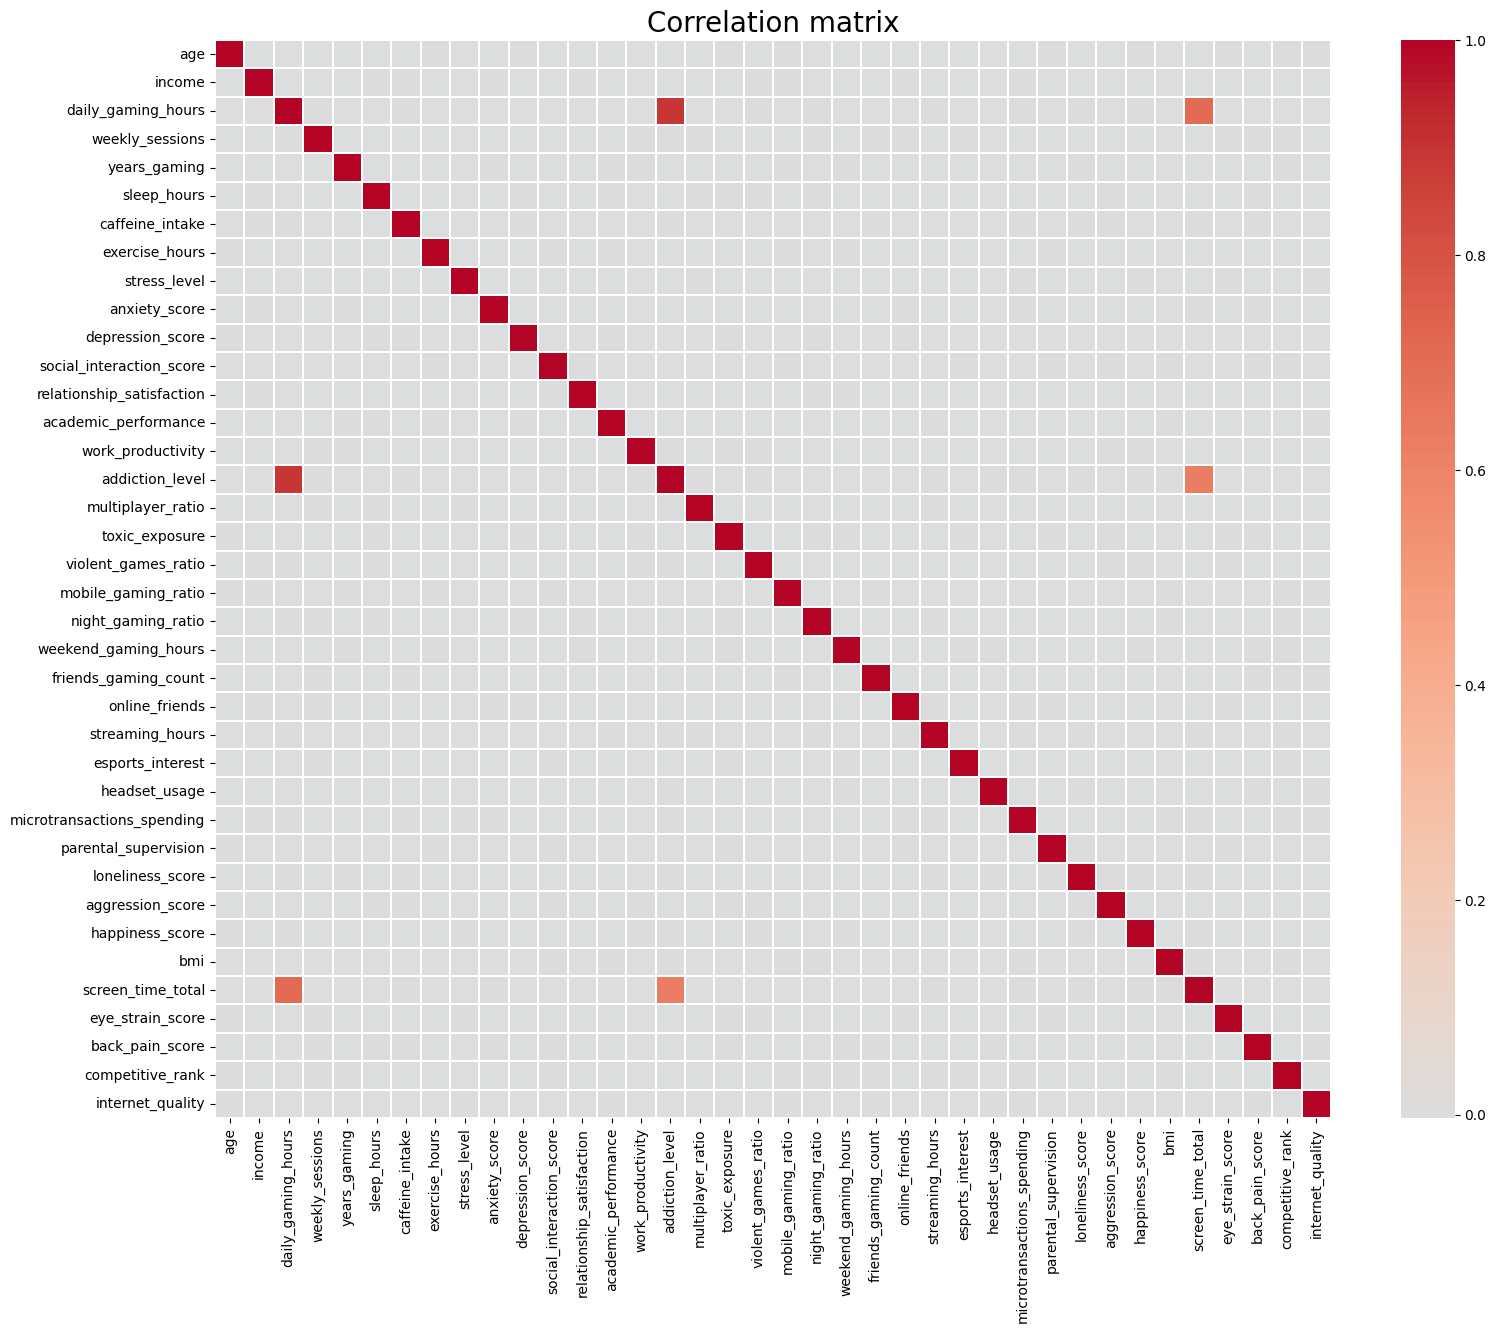

In [11]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(18,14))

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.2
)

plt.title("Correlation matrix", fontsize=20)
plt.show()

- most correlations are 0, that’s not normal for real behavioral data

Two relationships stand out in the table:

daily_gaming_hours ↔ addiction_level = 0.9

daily_gaming_hours ↔ screen_time_total = 0

Meaning:
- Addiction score is probably derived from gaming intensity
- Total screen time logically grows with gaming hours

Skew

In [12]:
df['stress_level'].skew().round(2)

np.float64(0.0)

In [13]:
df['happiness_score'].skew().round(2)

np.float64(-0.11)

- the distribution is almost perfectly symmetric, this stronghly confirms that the dataset was likely generated from a symmetric distribution
- behavior is balanced

<Axes: >

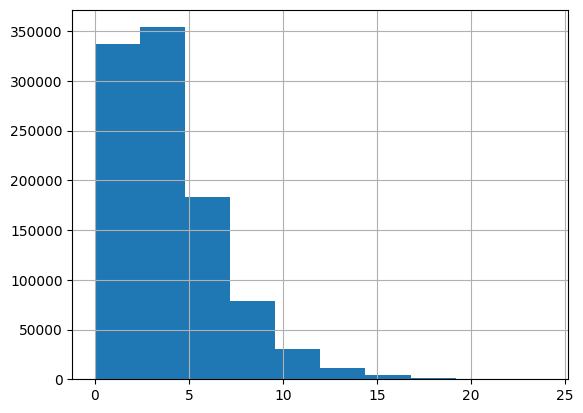

In [14]:
df['daily_gaming_hours'].hist()

# Daily gaming hours

In [15]:
df['daily_gaming_hours'].skew().round(2)

np.float64(1.39)

- strong right skew
- many casual gamers, few heavy gamers

# Daily gaming hours - Gender

In [16]:
gaming_hours = df.groupby('gender').agg(
    mean=('daily_gaming_hours', 'mean'),
    median=('daily_gaming_hours', 'median'),
    std=('daily_gaming_hours', 'std')
).sort_values(by='median', ascending=False).round(2)

gaming_hours

,mean,median,std
gender,,,
Female,4.00,3.36,2.82
Male,4.00,3.36,2.82
Other,4.02,3.36,2.83


- practically no difference in gaming intensity across genders in this synthetic dataset
- gender is not a primary driver variable here

# Daily gaming hours - Age

In [17]:
age = df.groupby('age').agg(
    mean=('daily_gaming_hours', 'mean'),
    median=('daily_gaming_hours', 'median'),
    std=('daily_gaming_hours', 'std')
).sort_values(by='median', ascending=False).round(2)

age

,mean,median,std
age,,,
39,4.03,3.41,2.80
20,4.03,3.40,2.83
27,4.04,3.39,2.85
30,4.03,3.39,2.83
15,4.00,3.39,2.81
26,4.01,3.38,2.82
24,4.03,3.38,2.84
49,4.00,3.38,2.79
35,4.01,3.38,2.84


- gaming intensity doesn't change with age here
- age is not a primary driver in this synthetic population

# Daily gaming hours - income

Low    = 5k–50k
Medium = 50k–100k
High   = 100k–150k

In [18]:
df["income_tier"] = pd.qcut(
    df["income"],
    q=3,
    labels=["low", "medium", "high"]
)



In [19]:
df["income_tier"].value_counts()
df.groupby("income_tier")["income"].agg(["min","median","max"])

/tmp/ipykernel_17/2201689008.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("income_tier")["income"].agg(["min","median","max"])


,min,median,max
income_tier,,,
low,5000,29114.0,53452
medium,53453,77521.0,101671
high,101672,125834.0,149999


- very evenly spaced
- income was probably generated from a smooth uniform-like distribution


In [20]:
df.groupby('income_tier')['daily_gaming_hours'].agg(["min","median","max"])

/tmp/ipykernel_17/680538659.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('income_tier')['daily_gaming_hours'].agg(["min","median","max"])


,min,median,max
income_tier,,,
low,0.00,3.35,23.88
medium,0.01,3.36,23.95
high,0.00,3.35,23.99


- gaming intensity is essentially independent of income in this dataset
- income isn’t a driver of gaming behavior

# Stress_level

<Axes: >

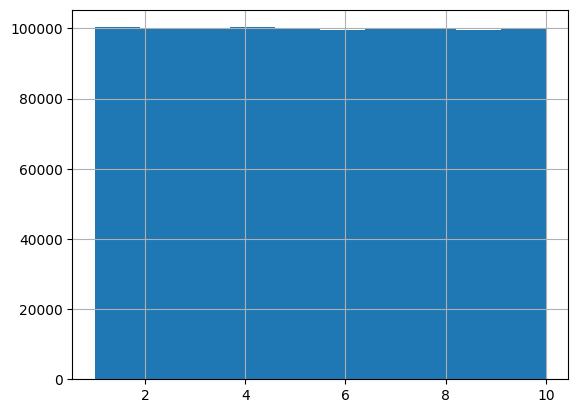

In [21]:
df['stress_level'].hist()

In [22]:
df['stress_level'].skew().round(2)

np.float64(0.0)

- the distribution is perfectly symmetric around its center
- low stress and high stress appear balanced
- no long tail of extreme cases

In [23]:
stress = df.groupby('gender').agg(
    mean=('stress_level', 'mean'),
    median=('stress_level', 'median'),
    std=('stress_level', 'std')
).sort_values(by='median', ascending=False).round(2)

stress

,mean,median,std
gender,,,
Female,5.5,5.0,2.87
Male,5.5,5.0,2.88
Other,5.5,5.0,2.87


- almost perfectly identical
- psychological outcomes were generated independently of gender in this synthetic dataset
- this dataset is NOT about strong variable relationships

# Conclusion:

Initial exploratory analysis of a large synthetic gaming dataset revealed structurally independent variables and limited behavioral signal, leading to a pivot toward datasets with stronger interaction patterns.